# Sprint Challenge Part 1 & 2

In [1]:
# Had to go back and install this so it would run below
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 21.5MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [2]:
# Imports
import dask.dataframe as dd
!pip install wordcloud -q
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Reading in the data

In [16]:
yt_comments = dd.read_csv("*.csv")

# Checking that it worked..

In [17]:
yt_comments.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


# Verifying the Total Number of Rows and Columns 

In [18]:
print('Total Number of Rows: %d' % len(yt_comments.index))
print('Total Number of Columns: %d' % len(yt_comments.columns))

Total Number of Rows: 1956
Total Number of Columns: 5


# Counting the number of Spam vs Not-Spam Comments

In [21]:
spammy = len(yt_comments[yt_comments.CLASS == 1])
not_spammy = len(yt_comments[yt_comments.CLASS == 0])

In [23]:
print('Total Spam Count: %d' % spammy)
print('Total Non-Spam Count: %d' % not_spammy)

Total Spam Count: 1005
Total Non-Spam Count: 951


# Comparing how many times the word "check" was used in Spam vs Not-Spam

In [24]:
# All the "checks"
check = yt_comments[yt_comments.CONTENT.str.lower().str.contains('check')]
# Spam
spammy = check.CLASS.sum().compute()
# Not Spam
not_spammy = len(check.index) - spammy

In [27]:
print ('Total times the word "check" appeared as spam: %d' % spammy)
print ('Total times the word "check" was not spam: %d' % not_spammy)

Total times the word "check" appeared as spam: 461
Total times the word "check" was not spam: 19


# Spam Comments WordCloud

In [28]:
spammy_asf = yt_comments[yt_comments.CLASS == 1].CONTENT.compute()
spam_cloud = ' '.join([comment for comment in spammy_asf.str.lower()])

### With more time, I would like to edit the wordcloud more. A border and a solid title would be nice. 

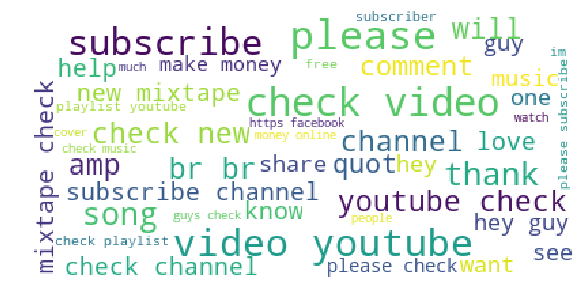

In [31]:
# How do I make this pink?

plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(spam_text)
plt.imshow(wordcloud)
#plt.title("Spam Comments") -- Not adding a title, will just be confusing
plt.axis("off")
plt.show();

# Not Spam Comments WordCloud

In [32]:
not_spammy_words = yt_comments[yt_comments.CLASS == 0].CONTENT.compute()
ns_cloud = ' '.join([comment for comment in not_spammy_words.str.lower()])

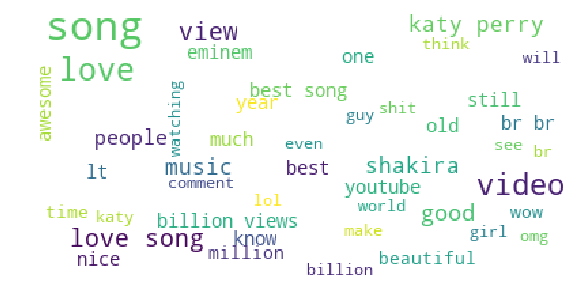

In [10]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(legit_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Part 2: Big Data Options

## Different Platforms

##### AWS SageMaker: Build, train, and deploy machine learning models at scale. Was designed with the focus on seamless adoption by the machine learning community and easy deployment of trained models to production. It offers python and Jupyter Notebook — everything we normally use to play with Machine Learning. 

##### AWS EMR: Or Elastic Map Reduce (Not going to use) Is for Big Data Processing.  Provides the infrastructure to run Apache Hadoop. Very good choice economically as it is one of the more cost efficient options, it integrates well with the other AWS services, deployment is simple and it provides flexibility to scale your cluster up or down as your computing needs change. For Engineers

##### Databricks: The service provides a cloud-based environment for data scientists, data engineers and business analysts to perform analysis quickly and interactively, build models and deploy workflows using Apache Spark. Below are some of the key reasons why Azure Databricks is an excellent choice for data science and big data workloads. Revered for it’s speed, security and collaboration. Within Azure Databricks, users can spin up clusters, create interactive notebooks and schedule jobs to run those notebooks. For DS

## Different Libraries

##### Numba: Numba is a just-in-time compiler for Python that works best on code that uses NumPy arrays and functions, and loops. The most common way to use Numba is through its collection of decorators that can be applied to your functions to instruct Numba to compile them.

##### Dask: Dask is simply the most revolutionary tool for data processing that I have encountered. ... Dask supports the Pandas dataframe and Numpy array data structures and is able to either be run on your local computer or be scaled up to run on a cluster.

##### MapReduce: MapReduce is the core component of processing in a Hadoop Ecosystem. MapReduce is a framework which helps in writing applications that processes large data sets using parallel algorithms in distributed Hadoop environment.

##### Spark: Spark uses Micro-batching for real-time streaming. Apache Spark is open source, general-purpose distributed computing engine used for processing and analyzing alarge amount of data. Just like Hadoop MapReduce, it also works with the system to distribute data across the cluster and process the data in parallel. Data scientists are exhibiting interest in working with Spark because of its ability to store data resident in memory that helps speed up machine learning workloads unlike Hadoop MapReduce.


## Different Languages

##### Python: First and foremost reason why Python is much popular because it is highly productive as compared to other programming languages like C++ and Java. ...Python is also very famous for its simple programming syntax, code readability and English-like commands that make coding in Python lot easier and efficient.

##### SQL: Essentially, Structured Query Language (SQL) is used to retrieve data or otherwise interface with a relational database. As a standard going back to the 1970s, SQL is a popular way to get information out of relational database systems.

##### Scala: Reasons why Scala language climbs the ranks of popularity. At the heart of today's technologies are programming languages. ... As a result, Scala programming is a bit more difficult, but the result is a much cleaner and well-organized language that is ultimately easier to use and increases productivity. Scala is frequently over 10 times faster than Python. Scala uses Java Virtual Machine (JVM) during runtime which gives is some speed over Python in most cases. Python is dynamically typed and this reduces the speed. Compiled languages are faster than interpreted.

##### Java: Java was designed to have the look and feel of the C++ programming language, but is simpler to use and enforces an object-oriented programming model. Java can be used to create complete applications that may run on a single computer or be distributed among servers and clients in a network.